In [1]:
# coding: utf-8
#!pip install pydotplus

import pandas as pd
import seaborn as sb
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score,confusion_matrix
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz, plot_tree
import pydotplus

In [2]:
#Carregando a base que será analisada
dataset = pd.read_csv('dataset/heart.csv', sep=',' , engine='python', error_bad_lines=False)
dataset.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Verificando se alguma das colunas está inconsistente
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿age    303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='target', ylabel='count'>

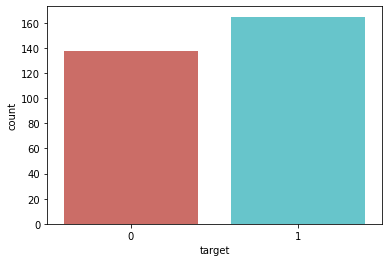

In [4]:
#Veficando a quantidade de saúdaveis e não saúdaveis
sb.countplot(x='target',data=dataset, palette='hls')

In [5]:
#Alterando o conteúdo das colunas para derar os dummies
dataset['cp'] = dataset['cp'].apply(lambda x: 'cp'+str(x))
dataset['ca'] = dataset['ca'].apply(lambda x: 'ca'+str(x))
dataset['thal'] = dataset['thal'].apply(lambda x: 'thal'+str(x))
dataset.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,cp3,145,233,1,0,150,0,2.3,0,ca0,thal1,1
1,37,1,cp2,130,250,0,1,187,0,3.5,0,ca0,thal2,1
2,41,0,cp1,130,204,0,0,172,0,1.4,2,ca0,thal2,1
3,56,1,cp1,120,236,0,1,178,0,0.8,2,ca0,thal2,1
4,57,0,cp0,120,354,0,1,163,1,0.6,2,ca0,thal2,1


In [6]:
#Tratando as variaveis categóricas
cp = pd.get_dummies(dataset['cp'],drop_first=True)
ca = pd.get_dummies(dataset['ca'],drop_first=True)
thal = pd.get_dummies(dataset['thal'],drop_first=True)

In [7]:
#Excluindo as colunas que não serão mais utilizadas
dataset = dataset.drop(columns=['cp','ca','thal'])
dataset.head()

,ï»¿age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,63,1,145,233,1,0,150,0,2.3,0,1
1,37,1,130,250,0,1,187,0,3.5,0,1
2,41,0,130,204,0,0,172,0,1.4,2,1
3,56,1,120,236,0,1,178,0,0.8,2,1
4,57,0,120,354,0,1,163,1,0.6,2,1


In [8]:
#Concatenando os dummies
dataset = pd.concat([dataset,cp,ca,thal],axis=1)
dataset.head()

,ï»¿age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,cp1,cp2,cp3,ca1,ca2,ca3,ca4,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,...,1,0,0,0,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,...,1,0,0,0,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,...,0,0,0,0,0,0,0,0,1,0


In [9]:
#Observando a matriz de correlação
dataset.corr()

,ï»¿age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,cp1,cp2,cp3,ca1,ca2,ca3,ca4,thal1,thal2,thal3
ï»¿age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,...,-0.147399,-0.059432,0.047516,0.179284,0.226491,0.162243,-0.122378,0.063758,-0.135891,0.110752
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,...,-0.041249,-0.116588,0.088043,0.096673,-0.020571,0.066758,0.088212,0.141135,-0.376365,0.321559
trestbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,...,-0.081851,-0.045107,0.151343,-0.059485,0.088386,0.080109,0.019059,0.076369,-0.140712,0.109573
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,...,-0.012750,-0.037918,-0.050589,0.018775,0.059887,0.098568,-0.095785,-0.093560,-0.004591,0.059621
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,...,-0.060649,0.083679,0.055511,-0.014774,0.122080,0.075867,0.018754,0.091351,-0.086774,0.030953
restecg,-0.116211,-0.058196,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,...,0.077859,0.084196,-0.074654,-0.050897,-0.058198,-0.064842,0.067098,-0.013429,0.029597,-0.023012
thalach,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,...,0.248317,0.165475,0.079082,-0.195502,-0.056905,-0.175506,0.060911,-0.159748,0.294801,-0.215417
exang,0.096801,0.141664,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,...,-0.233863,-0.271028,-0.093384,0.150206,0.097399,0.013188,-0.035001,0.063073,-0.328539,0.300223
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,...,-0.277513,-0.132444,0.086959,-0.011613,0.218319,0.189296,-0.104998,0.104635,-0.339086,0.302145
slope,-0.168814,-0.030711,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,...,0.202807,0.109769,-0.064509,0.000561,-0.035229,-0.107744,0.042249,-0.185825,0.298671,-0.217318


In [10]:
#Dividindo o dataset entre as variaveis que serão utilizadas e o target
x = dataset.drop(columns = 'target')
y = dataset['target']

In [11]:
#Divisão do dataset entre treino e teste com 80% para treino e 20 para testes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=29)

In [12]:
#Cria a arvore de decisão 
classificador = DecisionTreeClassifier()
#Treinando a arvore de decisão
classificador.fit(x_train, y_train)
#testando a classificação
y_pred = classificador.predict(x_test)

In [13]:
#Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        29
           1       0.71      0.69      0.70        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

0.6885245901639344


Neste Treinamento não houveram resultados muitos bons, gerando apenas 68% de acuracia com 67% de precisão e 69% de recall.
Abaixo temos um plot da arvore de decisão.

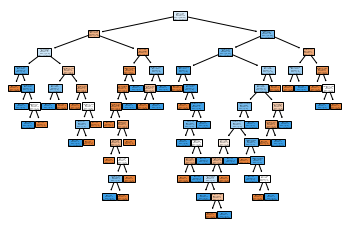

In [14]:
plot_tree(classificador, filled=True, feature_names =  x.columns.values, class_names = ['Saudavel', 'Não Saudavel']);

In [15]:
#Gerando a Arvore de decisão com apenas 5 nós folha
classificador = DecisionTreeClassifier(max_leaf_nodes  = 5)
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

0.7868852459016393


Definindo apenas o número maximo de nós definido em 5 já é possivel notar uma melhora na acuracia e precisão, e o recall foi mantido.

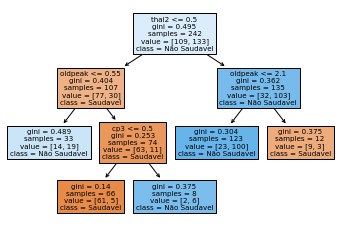

In [17]:
plot_tree(classificador, filled=True, feature_names =  x.columns.values, class_names = ['Saudavel', 'Não Saudavel']);

In [18]:
#Gerando a Arvore de decisão com apenas 5 nós folha
classificador = DecisionTreeClassifier(max_depth=4)
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

0.8524590163934426


Apenas definindo um número maximo de nós da arvore em 5 já podemos notar uma melhora na classificação chegando a ultrapassar 80% de acuracia, também com um aumento na precisão e recall.

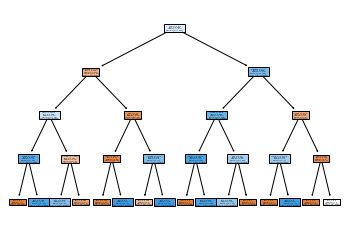

In [20]:
plot_tree(classificador, filled=True, feature_names =  x.columns.values, class_names = ['Saudavel', 'Não Saudavel']);

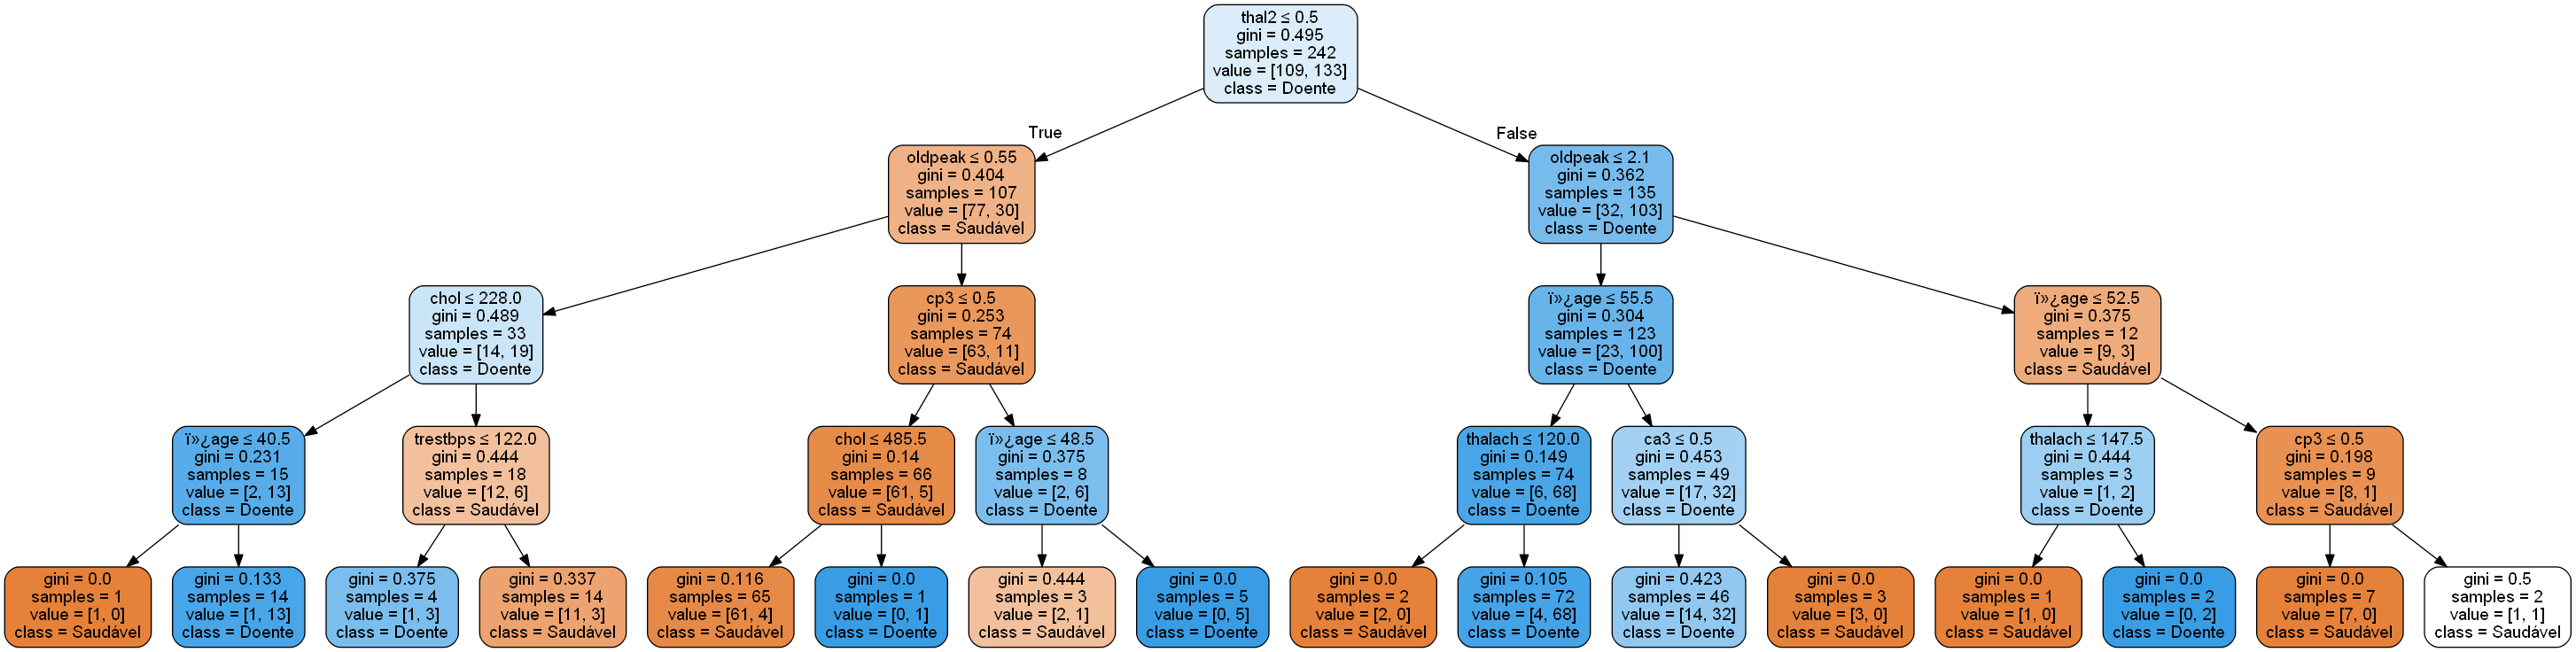

In [21]:
import os
os.environ['PATH'].split(os.pathsep)
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

dot_data = StringIO()
export_graphviz(classificador, out_file=dot_data,
        filled=True, rounded=True,
        feature_names = x.columns.values,
        class_names = ['Saudável', 'Doente'],
        special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Exibição da arvore de decisão utilizando o Graphviz